Import Libraries

In [61]:
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt

Newton's Method

In [41]:
def df_x1(x1, x2):
  return 4 * x1 + 3.4 * x2 * np.pi * np.sin(0.2 * np.pi * x1) - x2

In [42]:
def df_x2(x1, x2):
  return 4 * x2 - 17 * np.cos(0.2 * np.pi * x1) - x1

In [43]:
def df_x1x1(x1, x2):
  return 4 + 0.68 * x2 * np.pi**2 * np.cos(0.2 * np.pi * x1)

In [44]:
def df_x2x2(x1, x2):
  return 4

In [45]:
def Newton(iteration, x1, x2):
  for i in range(iteration):
    x1 = x1 - df_x1(x1, x2) / df_x1x1(x1, x2)
    x2 = x2 - df_x2(x1, x2) / df_x2x2(x1, x2)
  return x1, x2

In [46]:
def Initilize_x1_x2(step, x1_start, x1_end, x2_start, x2_end):
  x1 = np.arange(x1_start, x1_end + step, step)
  x2 = np.arange(x2_start, x2_end + step, step)
  return x1, x2

In [47]:
def Calculate_Distance(f, X1, X2, Exact_Value):
  if np.abs(f(X1, X2) - Exact_Value) < 1:
    return 'close'
  elif np.abs(f(X1, X2) - Exact_Value) < 500:
    return 'far'
  else:
    return 'farther'

In [48]:
def Find_Distance(f, iteration, Exact_Value, step, x1_start, x1_end, x2_start, x2_end):
  distance = []
  x1x2 = []
  x1, x2 = Initilize_x1_x2(step, x1_start, x1_end, x2_start, x2_end)
  for i in range(len(x1)):
    for j in range(len(x2)):
      X1, X2 = Newton(iteration, i, j)
      distance.append(Calculate_Distance(f, X1, X2, Exact_Value))
      x1x2.append([i, j])
  return distance, x1x2

In [52]:
def Graph_Distance(distance, x):
  for i in range(len(x)):
    if distance[i] == 'close':
      plt.scatter(x[i][0], x[i][1], color='y')
    elif distance[i] == 'far':
      plt.scatter(x[i][0], x[i][1], color='b')
    else:
      plt.scatter(x[i][0], x[i][1], color='g')

In [50]:
function = lambda x1, x2: 2 * (x1)**2 + 2 * (x2)**2 - 17 * x2 * np.cos(0.2 * np.pi * x1) - x1 * x2
x1_0 = 1
x2_0 =3
iteration = 100
x1, x2 = Newton(iteration, x1_0, x2_0)
print(f'Minimum found at x1 = {x1}, x2 = {x2} and min value of f = {function(x1, x2)}')

Minimum found at x1 = 0.13087466007249957, x2 = 4.268357652256218 and min value of f = -36.40349774185023


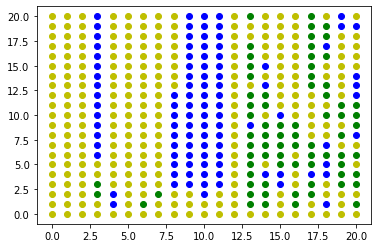

In [53]:
Exact_Value = -36.4
step = 0.5
x1_start = -5
x1_end = 5
x2_start = 0
x2_end = 10
distance, x = Find_Distance(function, iteration, Exact_Value, step, x1_start, x1_end, x2_start, x2_end)
Graph_Distance(distance, x)

Genetic Algorithm

In [54]:
def Population_Initialize(minimum, maximum, n_variables, pop_size):
  return [np.random.randint(minimum, maximum, size=(n_variables)) for i in range(pop_size)]

In [55]:
def Population_Evaluate(f, population):
  return [f(i[0], i[1]) for i in population]

In [56]:
def Fitness(results, pop_size, population):
  randA, randB = np.random.randint(0, pop_size), np.random.randint(0, pop_size)
  if results[randA] < results[randB]:
     p1 = population[randA]
  else:
     p1 = population[randB]
  randA, randB = np.random.randint(0, pop_size), np.random.randint(0, pop_size)  
  if results[randA] < results[randB]:
     p2 = population[randA]
  else:
     p2 = population[randB]
  signs = []
  for i in zip(p1, p2):
    if i[0] < 0 and i[1] < 0:
       signs.append(-1)
    elif i[0] >= 0 and i[1] >= 0:
       signs.append(1)
    else:
       signs.append(np.random.choice([-1, 1]))
  return p1, p2, signs

In [57]:
def Convert(p1, p2):
  p1 = [format(abs(i), '010b') for i in p1]
  p2 = [format(abs(i), '010b') for i in p2]
  return p1, p2

In [58]:
def Production(p1, p2, signs, children):
  child = []
  for i, j in zip(p1, p2):
    for k, l in zip(i, j):
      if k == l:
         child.append(k)
      else:
         child.append(str(np.random.randint(min(k, l), max(k, l))))
  child = ''.join(child)
  g1 = child[0:len(child) // 2] 
  g2 = child[len(child) // 2:len(child)]
  children.append(np.asarray([signs[0] * int(g1, 2), signs[1] * int(g2, 2)]))
  return children

In [59]:
def Genetic(f, minimum, maximum, n_variables, pop_size, iteration):
  population = Population_Initialize(minimum, maximum, n_variables, pop_size)
  for i in range(iteration):
    results = Population_Evaluate(f, population)
    children = [population[np.argmin(results)]]
    while len(children) < pop_size:
      parent_1, parent_2, signs = Fitness(results, pop_size, population)
      parent_1, parent_2 = Convert(parent_1, parent_2)
      children = Production(parent_1, parent_2, signs, children)
    population = children
  return population[0]

In [60]:
function = lambda x1, x2: 2 * (x1)**2 + 2 * (x2)**2 - 17 * x2 * np.cos(0.2 * np.pi * x1) - x1 * x2
Min = -15
Max = 15
n_variables = 2
pop_size = 100
iteration = 1000
answer = Genetic(function, Min, Max, n_variables, pop_size, iteration)
print(f'Minimum found at x1 = {answer[0]}, x2 = {answer[1]} and min value of f = {function(answer[0], answer[1])}')

Minimum found at x1 = 0, x2 = 4 and min value of f = -36.0
